#Atividade 2 – Projeto Python para análise de dados

##Enunciado e Perguntas

Você é um analista de dados de uma Gestora de Investimentos e recebeu alguns dados sobre
taxa de juros, dólar e outros indicadores econômicos. Porém, o fornecedor dos dados
aparentemente não é confiável, devido histórico anterior de problemas nos dados e vazamentos
de informações. Mediante estes pontos, realize as seguintes análises: 

1.   Identifique quais meses e anos apresentam falta de informações e qual percentual de perda.

2.   Identifique quais colunas apresentam falta de informações. Existe alguma variável que seria melhor não utilizá-la nas análises?

3.   Obtenha a média, mediana e correlação entre a taxa de variação do dólar, Selic e ipca eliminando os missings e imputando zero para os missings. Existiu diferença significativa? O que você recomendaria?
> *Dica: pesquisar a função pd.pct_change (auxiliar no cálculo da taxa de variação)

4.   Aplique a média e mediana para imputar valores aos missings de dólar, Selic e ipca. Obtenha
as correlações entre estas variáveis. Os valores apresentaram diferença em relação as análises
anteriores?

5.   Realizar a transformação z-score em todas as variáveis. Indique quais variáveis e quais meses foram encontrados valores acima de 3 ou abaixo de -3.

6.   Gere os seguintes box-plot e identifique se existe alguma observação como possível outlier.
> *   variação do dólar
> *   selic
> *   consumo de gasolina

7.   Gere os seguintes gráficos de dispersão e identifique se existe alguma observação como
possível outlier.
> *   variação do dólar x selic
> *   ipca x selic
> *   preço petróleo x consumo de gasolina

8.   Calcular o D2 de Mahalanobis utilizando as variáveis desemprego USA, desemprego SP e desemprego geral. Existe alguma observação candidata a outlier?

9.   Criar faixas pelos quartis para as seguintes variáveis:
> *   Desemprego USA
> *   Desemprego SP
> *   Desemprego Geral 

10.  Aplicar a winsorização para as seguintes variáveis:
> *   Consumo derivados petróleo
> *   Importação
> *   Consumo gasolina

## Importing Modules

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
#from scipy.spatial.distance import mahalanobis

##Carregando os dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Analise_de_dados/dados.csv', delimiter=';', decimal=',')
df.tail(61)

,mes,ano,dolar,ipca,selic,desemprego_usa,desemprego_sp,desemprego_geral,exportacao,importacao,saldo_mensal_balanca,taxa_cobertura_balanca,taxa_juros_eua,preco_petroleo,consumo_gasolina_m3,consumo_derivados_petroleo_barril,diesel_preco_medio_distribuidor,diesel_preco_medio_consumidor,etanol_preco_medio_consumidor,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,gnv_preco_medio_distribuidor,gnv_preco_medio_consumidor
89,6,2010,1.807,0.00,7.900,9.5,12.9,7.0,NaN,14.819,NaN,115.35,0.18,74.73,365.0,1.657,1.770,2.002,NaN,2.191,2.534,1.200,1.607
90,7,2010,1.770,0.01,8.600,NaN,12.6,6.9,17.673,16.316,1.357,NaN,0.18,NaN,369.0,1.680,1.770,NaN,1.238,2.193,NaN,NaN,1.607
91,8,2010,1.760,0.04,8.900,NaN,12.3,6.7,19.236,16.823,2.433,NaN,0.19,75.88,368.0,1.703,1.767,1.999,1.291,2.204,2.542,1.219,1.613
92,9,2010,1.719,0.45,8.500,9.6,11.5,NaN,18.833,17.745,1.089,106.13,0.19,76.11,388.0,NaN,1.768,1.998,1.318,NaN,NaN,NaN,NaN
93,10,2010,1.684,0.75,8.100,9.6,10.9,NaN,18.380,16.528,1.853,111.21,0.19,81.72,378.0,NaN,1.767,2.000,1.419,2.237,2.572,NaN,1.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2,2015,2.817,1.22,NaN,5.5,10.5,5.9,12.092,14.934,-2.842,80.96,0.11,54.93,524.0,1.896,2.414,2.788,NaN,NaN,3.301,1.450,1.944
146,3,2015,3.140,NaN,10.400,5.5,11.4,NaN,16.979,NaN,0.455,102.75,0.11,52.83,511.0,1.980,NaN,2.810,NaN,2.875,3.323,1.456,1.955
147,4,2015,3.044,0.71,NaN,5.4,12.4,6.4,15.156,14.665,NaN,103.34,0.12,NaN,527.0,1.955,NaN,2.809,1.788,2.873,3.308,1.470,1.986
148,5,2015,3.064,0.74,9.853,5.5,12.9,6.7,16.769,14.008,2.761,119.71,0.12,NaN,485.0,NaN,2.482,2.808,1.771,2.867,3.299,NaN,NaN


##Pré-processamento de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   mes                                150 non-null    int64  
 1   ano                                150 non-null    int64  
 2   dolar                              124 non-null    float64
 3   ipca                               113 non-null    float64
 4   selic                              109 non-null    float64
 5   desemprego_usa                     127 non-null    float64
 6   desemprego_sp                      127 non-null    float64
 7   desemprego_geral                   119 non-null    float64
 8   exportacao                         120 non-null    float64
 9   importacao                         117 non-null    float64
 10  saldo_mensal_balanca               117 non-null    float64
 11  taxa_cobertura_balanca             116 non-null    float64

In [ ]:
df.shape

(150, 23)

###1 – Identifique quais meses e anos apresentam falta de informações e qual percentual de perda.

In [ ]:
missings_por_linha = pd.DataFrame({'id': df.index.to_list(),
                                   'ano':df['ano'].tolist(),
                                   "mes":df['mes'].tolist(),
                                   'n_missings': df.isna().sum(axis=1).tolist()})
missings_por_linha.tail()

,id,ano,mes,n_missings
145,145,2015,2,3
146,146,2015,3,5
147,147,2015,4,4
148,148,2015,5,4
149,149,2015,6,5


In [ ]:
n_colunas_dados = df.shape[1] - 2 #subtraindo as duas colunas de mes e ano
n_colunas_dados

21

In [ ]:
missings_por_linha \
    .assign( perc_missings = missings_por_linha['n_missings'] / n_colunas_dados ) \
    .sort_values('perc_missings', ascending = False) \
    .head(20)

,id,ano,mes,n_missings,perc_missings
122,122,2013,3,10,0.476190
96,96,2011,1,9,0.428571
88,88,2010,5,9,0.428571
72,72,2009,1,8,0.380952
40,40,2006,5,8,0.380952
124,124,2013,5,8,0.380952
36,36,2006,1,8,0.380952
109,109,2012,2,8,0.380952
107,107,2011,12,7,0.333333
126,126,2013,7,7,0.333333


###2 – Identifique quais colunas apresentam falta de informações. Existe alguma variável que seria melhor não utilizá-la nas análises?

In [ ]:
missings_por_coluna = df.isna().sum()
missings_por_coluna

mes                                   0
ano                                   0
dolar                                26
ipca                                 37
selic                                41
desemprego_usa                       23
desemprego_sp                        23
desemprego_geral                     31
exportacao                           30
importacao                           33
saldo_mensal_balanca                 33
taxa_cobertura_balanca               34
taxa_juros_eua                       35
preco_petroleo                       27
consumo_gasolina_m3                  28
consumo_derivados_petroleo_barril    33
diesel_preco_medio_distribuidor      28
diesel_preco_medio_consumidor        30
etanol_preco_medio_consumidor        23
gasolina_preco_medio_distribuidor    28
gasolina_preco_medio_consumidor      31
gnv_preco_medio_distribuidor         28
gnv_preco_medio_consumidor           28
dtype: int64

In [ ]:
missings_por_coluna = pd.DataFrame( missings_por_coluna, 
                                   columns=['n']) \
                                   .reset_index() \
                                   .rename(columns={'index': 'variaveis'})
missings_por_coluna

,variaveis,n
0,mes,0
1,ano,0
2,dolar,26
3,ipca,37
4,selic,41
5,desemprego_usa,23
6,desemprego_sp,23
7,desemprego_geral,31
8,exportacao,30
9,importacao,33


In [ ]:
n_linhas = df.shape[0]
n_linhas

150

In [ ]:
missings_por_coluna.assign( perc_missings = missings_por_coluna['n'] / n_linhas).sort_values('n', ascending = False)

,variaveis,n,perc_missings
4,selic,41,0.273333
3,ipca,37,0.246667
12,taxa_juros_eua,35,0.233333
11,taxa_cobertura_balanca,34,0.226667
15,consumo_derivados_petroleo_barril,33,0.220000
9,importacao,33,0.220000
10,saldo_mensal_balanca,33,0.220000
20,gasolina_preco_medio_consumidor,31,0.206667
7,desemprego_geral,31,0.206667
8,exportacao,30,0.200000


#### Resposta 2

Temos porcentagens altas de 30%, mas acredito que não seja o suficiente para excluir nenhuma coluna da análise. Podemos trabalhar na substituição desses dados conforme a nossa necessidade mais pra frente.

###3 – Obtenha a média, mediana e correlação entre a taxa de variação do dólar, Selic e ipca eliminando os missings e imputando zero para os missings. Existiu diferença significativa? O que você recomendaria?

In [ ]:
df.head(5)

,mes,ano,dolar,ipca,selic,desemprego_usa,desemprego_sp,desemprego_geral,exportacao,importacao,saldo_mensal_balanca,taxa_cobertura_balanca,taxa_juros_eua,preco_petroleo,consumo_gasolina_m3,consumo_derivados_petroleo_barril,diesel_preco_medio_distribuidor,diesel_preco_medio_consumidor,etanol_preco_medio_consumidor,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,gnv_preco_medio_distribuidor,gnv_preco_medio_consumidor
0,1,2003,3.435,2.25,19.713,NaN,18.6,11.2,4.805,NaN,1.155,131.64,1.24,30.77,282.0,1.205,1.324,1.527,1.138,NaN,2.160,NaN,1.029
1,2,2003,3.590,1.57,18.304,5.8,19.1,11.6,5.001,NaN,1.113,128.63,1.26,32.88,NaN,1.272,NaN,NaN,1.257,NaN,2.223,0.696,1.071
2,3,2003,3.446,1.23,NaN,5.8,19.7,12.1,5.239,NaN,1.537,141.52,1.25,30.36,243.0,NaN,NaN,1.537,1.314,1.947,2.215,NaN,1.070
3,4,2003,3.119,0.97,18.716,6.0,NaN,12.4,5.710,NaN,1.720,143.11,1.26,25.49,272.0,1.255,1.354,1.529,1.308,1.941,2.195,0.723,1.068
4,5,2003,2.956,0.61,19.654,6.1,20.6,12.8,6.372,3.854,2.518,165.33,1.26,26.06,284.0,1.294,1.276,1.456,1.270,1.869,2.113,0.717,1.066


In [ ]:
df_dólar_Selic_ipca = df[['dolar','ipca','selic']]
df_dólar_Selic_ipca = df_dólar_Selic_ipca[df.ipca != 0]
df_dólar_Selic_ipca

,dolar,ipca,selic
0,3.435,2.25,19.713
1,3.590,1.57,18.304
2,3.446,1.23,NaN
3,3.119,0.97,18.716
4,2.956,0.61,19.654
...,...,...,...
145,2.817,1.22,NaN
146,3.140,NaN,10.400
147,3.044,0.71,NaN
148,3.064,0.74,9.853


#### Eliminando Missings

In [ ]:
df_dólar_Selic_ipca.dropna().pct_change().describe()

,dolar,ipca,selic
count,66.000000,66.000000,66.000000
mean,-0.000021,0.208136,0.107982
std,0.059868,2.102411,1.006096
min,-0.147895,-9.500000,-0.907933
25%,-0.030920,-0.354221,-0.081285
50%,-0.008203,-0.014085,-0.006844
75%,0.020355,0.523214,0.063820
max,0.197270,10.250000,8.044317


In [ ]:
df_dólar_Selic_ipca.dropna().pct_change()[['dolar', 'ipca','selic']].corr()

,dolar,ipca,selic
dolar,1.000000,-0.049315,-0.068724
ipca,-0.049315,1.000000,0.042951
selic,-0.068724,0.042951,1.000000


#### Substituindo por 0


In [ ]:
df_dólar_Selic_ipca.fillna(0).pct_change().describe()

,dolar,ipca,selic
count,143.000000,140.000000,137.000000
mean,inf,NaN,inf
std,NaN,NaN,NaN
min,-1.000000,-inf,-1.000000
25%,-0.033010,-0.694849,-0.188999
50%,-0.004625,-0.016667,-0.027255
75%,0.040575,1.034976,0.175910
max,inf,inf,inf


In [ ]:
df_dólar_Selic_ipca.fillna(0).pct_change()[['dolar', 'ipca','selic']].corr()

,dolar,ipca,selic
dolar,1.000000,-0.037103,0.024001
ipca,-0.037103,1.000000,0.111310
selic,0.024001,0.111310,1.000000


#### Resposta 3

Neste caso é melhor realizar a exclusão dos valores missing, pois na hora de fazer o calculo de diferença porcentual no caso de 0 a difertença percentual de 0 para qualquer outro valor é infinito. Logo nos prejudica na obtensão desses dados.

###4 – Aplique a média e mediana para imputar valores aos missings de dólar, Selic e ipca. Obtenha as correlações entre estas variáveis. Os valores apresentaram diferença em relação as análises anteriores?

In [ ]:
stats = df_dólar_Selic_ipca.describe()
stats

,dolar,ipca,selic
count,123.000000,112.000000,108.000000
mean,2.307837,0.505179,11.673954
std,0.850437,0.319614,13.922322
min,1.564000,-0.210000,4.933000
25%,1.816500,0.337500,7.850000
50%,2.173000,0.470000,9.502000
75%,2.588500,0.652500,12.710500
max,10.000000,2.250000,150.000000


In [ ]:
stats['dolar'].loc['mean']

2.3078373983739837

In [ ]:
stats['dolar'].loc['50%']

2.173

In [ ]:
stats['ipca'].loc['mean']

0.5051785714285714

In [ ]:
stats['ipca'].loc['50%']

0.47

In [ ]:
stats['selic'].loc['mean']

11.673953703703708

In [ ]:
stats['selic'].loc['50%']

9.502

####usando media

In [ ]:
df_dólar_Selic_ipca2 = df_dólar_Selic_ipca \
    .assign(dolar2 = df_dólar_Selic_ipca['dolar'].fillna(stats['dolar'].loc['mean']) ) \
    .assign(ipca2 = df_dólar_Selic_ipca['ipca'].fillna(stats['ipca'].loc['mean']) ) \
    .assign(selic2 = df_dólar_Selic_ipca['selic'].fillna(stats['selic'].loc['mean']) )

In [ ]:
df_dólar_Selic_ipca2

,dolar,ipca,selic,dolar2,ipca2,selic2
0,3.435,2.25,19.713,3.435,2.250000,19.713000
1,3.590,1.57,18.304,3.590,1.570000,18.304000
2,3.446,1.23,NaN,3.446,1.230000,11.673954
3,3.119,0.97,18.716,3.119,0.970000,18.716000
4,2.956,0.61,19.654,2.956,0.610000,19.654000
...,...,...,...,...,...,...
145,2.817,1.22,NaN,2.817,1.220000,11.673954
146,3.140,NaN,10.400,3.140,0.505179,10.400000
147,3.044,0.71,NaN,3.044,0.710000,11.673954
148,3.064,0.74,9.853,3.064,0.740000,9.853000


In [ ]:
df_dólar_Selic_ipca2[['dolar2', 'ipca2','selic2']].pct_change().describe()

,dolar2,ipca2,selic2
count,148.000000,148.000000,148.000000
mean,0.023423,-0.010200,0.072127
std,0.301688,2.557555,0.707334
min,-0.761600,-26.258929,-0.906187
25%,-0.029695,-0.307748,-0.106827
50%,-0.003825,0.000000,0.000000
75%,0.033581,0.365854,0.117628
max,3.264392,10.250000,8.044317


In [ ]:
df_dólar_Selic_ipca2[['dolar2', 'ipca2','selic2']].pct_change().corr()

,dolar2,ipca2,selic2
dolar2,1.000000,-0.009365,-0.009366
ipca2,-0.009365,1.000000,0.026883
selic2,-0.009366,0.026883,1.000000


####usando mediana

In [ ]:
df_dólar_Selic_ipca3 = df_dólar_Selic_ipca \
    .assign(dolar2 = df_dólar_Selic_ipca['dolar'].fillna(stats['dolar'].loc['50%']) ) \
    .assign(ipca2 = df_dólar_Selic_ipca['ipca'].fillna(stats['ipca'].loc['50%']) ) \
    .assign(selic2 = df_dólar_Selic_ipca['selic'].fillna(stats['selic'].loc['50%']) )
df_dólar_Selic_ipca3

,dolar,ipca,selic,dolar2,ipca2,selic2
0,3.435,2.25,19.713,3.435,2.25,19.713
1,3.590,1.57,18.304,3.590,1.57,18.304
2,3.446,1.23,NaN,3.446,1.23,9.502
3,3.119,0.97,18.716,3.119,0.97,18.716
4,2.956,0.61,19.654,2.956,0.61,19.654
...,...,...,...,...,...,...
145,2.817,1.22,NaN,2.817,1.22,9.502
146,3.140,NaN,10.400,3.140,0.47,10.400
147,3.044,0.71,NaN,3.044,0.71,9.502
148,3.064,0.74,9.853,3.064,0.74,9.853


In [ ]:
df_dólar_Selic_ipca3[['dolar2', 'ipca2','selic2']].pct_change().describe()

,dolar2,ipca2,selic2
count,148.000000,148.000000,148.000000
mean,0.022397,0.000676,0.062885
std,0.298222,2.417460,0.695398
min,-0.761600,-24.500000,-0.906187
25%,-0.029695,-0.298529,-0.100581
50%,-0.004402,0.000000,0.000000
75%,0.031760,0.366865,0.097556
max,3.264392,10.250000,8.044317


In [ ]:
df_dólar_Selic_ipca3[['dolar2', 'ipca2','selic2']].pct_change().corr()

,dolar2,ipca2,selic2
dolar2,1.000000,-0.020524,-0.012114
ipca2,-0.020524,1.000000,0.029804
selic2,-0.012114,0.029804,1.000000


###5 – Realizar a transformação z-score em todas as variáveis. Indique quais variáveis e quais meses foram encontrados valores acima de 3 ou abaixo de -3.

In [ ]:
df

,mes,ano,dolar,ipca,selic,desemprego_usa,desemprego_sp,desemprego_geral,exportacao,importacao,saldo_mensal_balanca,taxa_cobertura_balanca,taxa_juros_eua,preco_petroleo,consumo_gasolina_m3,consumo_derivados_petroleo_barril,diesel_preco_medio_distribuidor,diesel_preco_medio_consumidor,etanol_preco_medio_consumidor,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,gnv_preco_medio_distribuidor,gnv_preco_medio_consumidor
0,1,2003,3.435,2.25,19.713,NaN,18.6,11.2,4.805,NaN,1.155,131.64,1.24,30.77,282.0,1.205,1.324,1.527,1.138,NaN,2.160,NaN,1.029
1,2,2003,3.590,1.57,18.304,5.8,19.1,11.6,5.001,NaN,1.113,128.63,1.26,32.88,NaN,1.272,NaN,NaN,1.257,NaN,2.223,0.696,1.071
2,3,2003,3.446,1.23,NaN,5.8,19.7,12.1,5.239,NaN,1.537,141.52,1.25,30.36,243.0,NaN,NaN,1.537,1.314,1.947,2.215,NaN,1.070
3,4,2003,3.119,0.97,18.716,6.0,NaN,12.4,5.710,NaN,1.720,143.11,1.26,25.49,272.0,1.255,1.354,1.529,1.308,1.941,2.195,0.723,1.068
4,5,2003,2.956,0.61,19.654,6.1,20.6,12.8,6.372,3.854,2.518,165.33,1.26,26.06,284.0,1.294,1.276,1.456,1.270,1.869,2.113,0.717,1.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2,2015,2.817,1.22,NaN,5.5,10.5,5.9,12.092,14.934,-2.842,80.96,0.11,54.93,524.0,1.896,2.414,2.788,NaN,NaN,3.301,1.450,1.944
146,3,2015,3.140,NaN,10.400,5.5,11.4,NaN,16.979,NaN,0.455,102.75,0.11,52.83,511.0,1.980,NaN,2.810,NaN,2.875,3.323,1.456,1.955
147,4,2015,3.044,0.71,NaN,5.4,12.4,6.4,15.156,14.665,NaN,103.34,0.12,NaN,527.0,1.955,NaN,2.809,1.788,2.873,3.308,1.470,1.986
148,5,2015,3.064,0.74,9.853,5.5,12.9,6.7,16.769,14.008,2.761,119.71,0.12,NaN,485.0,NaN,2.482,2.808,1.771,2.867,3.299,NaN,NaN


image.png

In [ ]:
df_zscore = df.copy()
df_zscore

,mes,ano,dolar,ipca,selic,desemprego_usa,desemprego_sp,desemprego_geral,exportacao,importacao,saldo_mensal_balanca,taxa_cobertura_balanca,taxa_juros_eua,preco_petroleo,consumo_gasolina_m3,consumo_derivados_petroleo_barril,diesel_preco_medio_distribuidor,diesel_preco_medio_consumidor,etanol_preco_medio_consumidor,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,gnv_preco_medio_distribuidor,gnv_preco_medio_consumidor
0,1,2003,3.435,2.25,19.713,NaN,18.6,11.2,4.805,NaN,1.155,131.64,1.24,30.77,282.0,1.205,1.324,1.527,1.138,NaN,2.160,NaN,1.029
1,2,2003,3.590,1.57,18.304,5.8,19.1,11.6,5.001,NaN,1.113,128.63,1.26,32.88,NaN,1.272,NaN,NaN,1.257,NaN,2.223,0.696,1.071
2,3,2003,3.446,1.23,NaN,5.8,19.7,12.1,5.239,NaN,1.537,141.52,1.25,30.36,243.0,NaN,NaN,1.537,1.314,1.947,2.215,NaN,1.070
3,4,2003,3.119,0.97,18.716,6.0,NaN,12.4,5.710,NaN,1.720,143.11,1.26,25.49,272.0,1.255,1.354,1.529,1.308,1.941,2.195,0.723,1.068
4,5,2003,2.956,0.61,19.654,6.1,20.6,12.8,6.372,3.854,2.518,165.33,1.26,26.06,284.0,1.294,1.276,1.456,1.270,1.869,2.113,0.717,1.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2,2015,2.817,1.22,NaN,5.5,10.5,5.9,12.092,14.934,-2.842,80.96,0.11,54.93,524.0,1.896,2.414,2.788,NaN,NaN,3.301,1.450,1.944
146,3,2015,3.140,NaN,10.400,5.5,11.4,NaN,16.979,NaN,0.455,102.75,0.11,52.83,511.0,1.980,NaN,2.810,NaN,2.875,3.323,1.456,1.955
147,4,2015,3.044,0.71,NaN,5.4,12.4,6.4,15.156,14.665,NaN,103.34,0.12,NaN,527.0,1.955,NaN,2.809,1.788,2.873,3.308,1.470,1.986
148,5,2015,3.064,0.74,9.853,5.5,12.9,6.7,16.769,14.008,2.761,119.71,0.12,NaN,485.0,NaN,2.482,2.808,1.771,2.867,3.299,NaN,NaN


In [ ]:
def z_score(column):
  df_zscore[column+'_z'] = (df_zscore[column]-df_zscore[column].mean())/df_zscore[column].std()
  print('-'*20)
  print(f' id of the values for column {column} that are above 3:')
  print(df_zscore[[column+'_z']].sort_values(column+'_z', ascending = False)[df_zscore[column+'_z'] >3])
  print()
  print('-'*20)

In [ ]:
for i in range(23):
  z_score(df_zscore.columns[i])

--------------------
 id of the values for column mes that are above 3:
Empty DataFrame
Columns: [mes_z]
Index: []

--------------------
--------------------
 id of the values for column ano that are above 3:
Empty DataFrame
Columns: [ano_z]
Index: []

--------------------
--------------------
 id of the values for column dolar that are above 3:
      dolar_z
132  9.073931

--------------------
--------------------
 id of the values for column ipca that are above 3:
     ipca_z
0  5.437424
1  3.323741

--------------------
--------------------
 id of the values for column selic that are above 3:
     selic_z
32  9.980982

--------------------
--------------------
 id of the values for column desemprego_usa that are above 3:
    desemprego_usa_z
11          3.445634

--------------------
--------------------
 id of the values for column desemprego_sp that are above 3:
    desemprego_sp_z
82        10.479515

--------------------
--------------------
 id of the values for column desempre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/l

Empty DataFrame
Columns: [diesel_preco_medio_consumidor_z]
Index: []

--------------------
--------------------
 id of the values for column etanol_preco_medio_consumidor that are above 3:
Empty DataFrame
Columns: [etanol_preco_medio_consumidor_z]
Index: []

--------------------
--------------------
 id of the values for column gasolina_preco_medio_distribuidor that are above 3:
    gasolina_preco_medio_distribuidor_z
11                              4.64261

--------------------
--------------------
 id of the values for column gasolina_preco_medio_consumidor that are above 3:
    gasolina_preco_medio_consumidor_z
11                           4.295459

--------------------
--------------------
 id of the values for column gnv_preco_medio_distribuidor that are above 3:
Empty DataFrame
Columns: [gnv_preco_medio_distribuidor_z]
Index: []

--------------------
--------------------
 id of the values for column gnv_preco_medio_consumidor that are above 3:
Empty DataFrame
Columns: [gnv_preco_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
#df_z = df.apply(stats.zscore)
#df_z

###6 – Gere os seguintes box-plot e identifique se existe alguma observação como possível outlier.
a) variação do dólar <br/>
b) selic<br/>
c) consumo de gasolina

In [ ]:
df

,mes,ano,dolar,ipca,selic,desemprego_usa,desemprego_sp,desemprego_geral,exportacao,importacao,saldo_mensal_balanca,taxa_cobertura_balanca,taxa_juros_eua,preco_petroleo,consumo_gasolina_m3,consumo_derivados_petroleo_barril,diesel_preco_medio_distribuidor,diesel_preco_medio_consumidor,etanol_preco_medio_consumidor,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,gnv_preco_medio_distribuidor,gnv_preco_medio_consumidor
0,1,2003,3.435,2.25,19.713,NaN,18.6,11.2,4.805,NaN,1.155,131.64,1.24,30.77,282.0,1.205,1.324,1.527,1.138,NaN,2.160,NaN,1.029
1,2,2003,3.590,1.57,18.304,5.8,19.1,11.6,5.001,NaN,1.113,128.63,1.26,32.88,NaN,1.272,NaN,NaN,1.257,NaN,2.223,0.696,1.071
2,3,2003,3.446,1.23,NaN,5.8,19.7,12.1,5.239,NaN,1.537,141.52,1.25,30.36,243.0,NaN,NaN,1.537,1.314,1.947,2.215,NaN,1.070
3,4,2003,3.119,0.97,18.716,6.0,NaN,12.4,5.710,NaN,1.720,143.11,1.26,25.49,272.0,1.255,1.354,1.529,1.308,1.941,2.195,0.723,1.068
4,5,2003,2.956,0.61,19.654,6.1,20.6,12.8,6.372,3.854,2.518,165.33,1.26,26.06,284.0,1.294,1.276,1.456,1.270,1.869,2.113,0.717,1.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2,2015,2.817,1.22,NaN,5.5,10.5,5.9,12.092,14.934,-2.842,80.96,0.11,54.93,524.0,1.896,2.414,2.788,NaN,NaN,3.301,1.450,1.944
146,3,2015,3.140,NaN,10.400,5.5,11.4,NaN,16.979,NaN,0.455,102.75,0.11,52.83,511.0,1.980,NaN,2.810,NaN,2.875,3.323,1.456,1.955
147,4,2015,3.044,0.71,NaN,5.4,12.4,6.4,15.156,14.665,NaN,103.34,0.12,NaN,527.0,1.955,NaN,2.809,1.788,2.873,3.308,1.470,1.986
148,5,2015,3.064,0.74,9.853,5.5,12.9,6.7,16.769,14.008,2.761,119.71,0.12,NaN,485.0,NaN,2.482,2.808,1.771,2.867,3.299,NaN,NaN


In [ ]:
df_dólar_var = df.assign(var_dolar = df['dolar'].pct_change() )
df_dólar_var.head(3)

,mes,ano,dolar,ipca,selic,desemprego_usa,desemprego_sp,desemprego_geral,exportacao,importacao,saldo_mensal_balanca,taxa_cobertura_balanca,taxa_juros_eua,preco_petroleo,consumo_gasolina_m3,consumo_derivados_petroleo_barril,diesel_preco_medio_distribuidor,diesel_preco_medio_consumidor,etanol_preco_medio_consumidor,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,gnv_preco_medio_distribuidor,gnv_preco_medio_consumidor,var_dolar
0,1,2003,3.435,2.25,19.713,NaN,18.6,11.2,4.805,NaN,1.155,131.64,1.24,30.77,282.0,1.205,1.324,1.527,1.138,NaN,2.160,NaN,1.029,NaN
1,2,2003,3.590,1.57,18.304,5.8,19.1,11.6,5.001,NaN,1.113,128.63,1.26,32.88,NaN,1.272,NaN,NaN,1.257,NaN,2.223,0.696,1.071,0.045124
2,3,2003,3.446,1.23,NaN,5.8,19.7,12.1,5.239,NaN,1.537,141.52,1.25,30.36,243.0,NaN,NaN,1.537,1.314,1.947,2.215,NaN,1.070,-0.040111


####Selic

Tem um outlayer com o valor de 150 no mes 09 de 2005

In [ ]:
import plotly.express as px

In [ ]:
fig = px.box(df, y="selic", hover_data=['mes','ano'])
fig.show()

In [ ]:
fig = px.line(df_dólar_var, x=df_dólar_var.index, y="selic",hover_data=['mes','ano'])
fig.show()

#### Variação Dolar

Existe 2 outlayers localizados nos meses 1 e 2 de 2014

In [ ]:
fig = px.box(df_dólar_var, y="var_dolar", hover_data=['mes','ano'])
fig.show()

In [ ]:
fig = px.line(df_dólar_var, x=df_dólar_var.index, y="var_dolar",hover_data=['mes','ano'])
fig.show()

#### Consumo Gasolina

Existe um outlayer de 10k no mes 9 de 2003

In [ ]:
fig = px.box(df_dólar_var, y="consumo_gasolina_m3", hover_data=['mes','ano'])
fig.show()

In [ ]:
fig = px.line(df_dólar_var, x=df_dólar_var.index, y="consumo_gasolina_m3",hover_data=['mes','ano'])
fig.show()

###7 – Gere os seguintes gráficos de dispersão e identifique se existe alguma observação como possível outlier.
a) variação do dólar x selic <br/>
b) ipca x selic<br/>
c) preço petróleo x consumo de gasolina

####variação do dólar x selic

In [ ]:
fig = px.scatter(df_dólar_var, x="var_dolar", y="selic")
fig.show()

Removendo os outlayers:

In [ ]:
fig = px.scatter(df_dólar_var[df_dólar_var.selic < 25 ][df_dólar_var.var_dolar < 0.5][df_dólar_var.var_dolar >-0.2], x="var_dolar", y="selic")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



####ipca x selic

In [ ]:
fig = px.scatter(df_dólar_var, x="ipca", y="selic")
fig.show()

Removendo os outlayers:

In [ ]:
fig = px.scatter(df_dólar_var[df_dólar_var.selic < 25 ], x="ipca", y="selic")
fig.show()

####preço petróleo x consumo de gasolina

In [ ]:
fig = px.scatter(df_dólar_var, x="preco_petroleo", y="consumo_gasolina_m3")
fig.show()

Removendo os outlayers:

In [ ]:
fig = px.scatter(df_dólar_var[df_dólar_var.consumo_gasolina_m3 < 2000], x="preco_petroleo", y="consumo_gasolina_m3")
fig.show()

###8 – Calcular o D2 de Mahalanobis utilizando as variáveis desemprego USA, desemprego SP e desemprego geral. Existe alguma observação candidata a outlier?

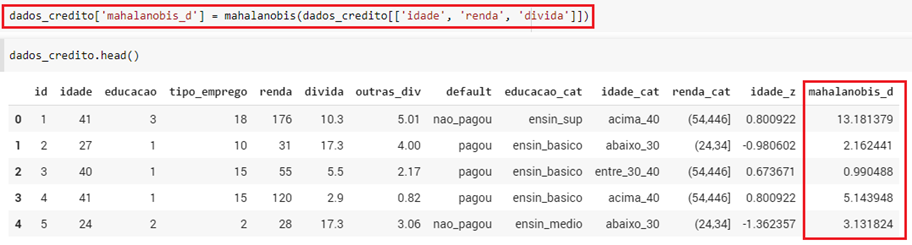

In [ ]:
# ['desemprego_usa','desemprego_sp','desemprego_geral']

def mahalanobis1(data=None):
  x_minus_mu = data - np.mean(data)
  cov = np.cov(data.values.T)
  inv_covmat = np.linalg.inv(cov)
  left_term = np.dot(x_minus_mu, inv_covmat)
  mahal = np.dot(left_term, x_minus_mu.T)

  return mahal.diagonal()

In [ ]:
df_mahalanobis[['desemprego_usa','desemprego_sp','desemprego_geral']].dropna()

In [ ]:
df_mahalanobis = df.copy()
df_mahalanobis['mahalanobis_d'] = mahalanobis1(df_mahalanobis[['desemprego_usa','desemprego_sp','desemprego_geral']])
df_mahalanobis

,mes,ano,dolar,ipca,selic,desemprego_usa,desemprego_sp,desemprego_geral,exportacao,importacao,saldo_mensal_balanca,taxa_cobertura_balanca,taxa_juros_eua,preco_petroleo,consumo_gasolina_m3,consumo_derivados_petroleo_barril,diesel_preco_medio_distribuidor,diesel_preco_medio_consumidor,etanol_preco_medio_consumidor,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,gnv_preco_medio_distribuidor,gnv_preco_medio_consumidor,mahalanobis_d
0,1,2003,3.435,2.25,19.713,NaN,18.6,11.2,4.805,NaN,1.155,131.64,1.24,30.77,282.0,1.205,1.324,1.527,1.138,NaN,2.160,NaN,1.029,NaN
1,2,2003,3.590,1.57,18.304,5.8,19.1,11.6,5.001,NaN,1.113,128.63,1.26,32.88,NaN,1.272,NaN,NaN,1.257,NaN,2.223,0.696,1.071,NaN
2,3,2003,3.446,1.23,NaN,5.8,19.7,12.1,5.239,NaN,1.537,141.52,1.25,30.36,243.0,NaN,NaN,1.537,1.314,1.947,2.215,NaN,1.070,NaN
3,4,2003,3.119,0.97,18.716,6.0,NaN,12.4,5.710,NaN,1.720,143.11,1.26,25.49,272.0,1.255,1.354,1.529,1.308,1.941,2.195,0.723,1.068,NaN
4,5,2003,2.956,0.61,19.654,6.1,20.6,12.8,6.372,3.854,2.518,165.33,1.26,26.06,284.0,1.294,1.276,1.456,1.270,1.869,2.113,0.717,1.066,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2,2015,2.817,1.22,NaN,5.5,10.5,5.9,12.092,14.934,-2.842,80.96,0.11,54.93,524.0,1.896,2.414,2.788,NaN,NaN,3.301,1.450,1.944,NaN
146,3,2015,3.140,NaN,10.400,5.5,11.4,NaN,16.979,NaN,0.455,102.75,0.11,52.83,511.0,1.980,NaN,2.810,NaN,2.875,3.323,1.456,1.955,NaN
147,4,2015,3.044,0.71,NaN,5.4,12.4,6.4,15.156,14.665,NaN,103.34,0.12,NaN,527.0,1.955,NaN,2.809,1.788,2.873,3.308,1.470,1.986,NaN
148,5,2015,3.064,0.74,9.853,5.5,12.9,6.7,16.769,14.008,2.761,119.71,0.12,NaN,485.0,NaN,2.482,2.808,1.771,2.867,3.299,NaN,NaN,NaN


###9 – Criar faixas pelos quartis para as seguintes variáveis:
a) Desemprego USA <br/>
b) Desemprego SP <br/>
c) Desemprego Geral

In [ ]:
df_faixas = df.copy()
df_faixas

,mes,ano,dolar,ipca,selic,desemprego_usa,desemprego_sp,desemprego_geral,exportacao,importacao,saldo_mensal_balanca,taxa_cobertura_balanca,taxa_juros_eua,preco_petroleo,consumo_gasolina_m3,consumo_derivados_petroleo_barril,diesel_preco_medio_distribuidor,diesel_preco_medio_consumidor,etanol_preco_medio_consumidor,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,gnv_preco_medio_distribuidor,gnv_preco_medio_consumidor
0,1,2003,3.435,2.25,19.713,NaN,18.6,11.2,4.805,NaN,1.155,131.64,1.24,30.77,282.0,1.205,1.324,1.527,1.138,NaN,2.160,NaN,1.029
1,2,2003,3.590,1.57,18.304,5.8,19.1,11.6,5.001,NaN,1.113,128.63,1.26,32.88,NaN,1.272,NaN,NaN,1.257,NaN,2.223,0.696,1.071
2,3,2003,3.446,1.23,NaN,5.8,19.7,12.1,5.239,NaN,1.537,141.52,1.25,30.36,243.0,NaN,NaN,1.537,1.314,1.947,2.215,NaN,1.070
3,4,2003,3.119,0.97,18.716,6.0,NaN,12.4,5.710,NaN,1.720,143.11,1.26,25.49,272.0,1.255,1.354,1.529,1.308,1.941,2.195,0.723,1.068
4,5,2003,2.956,0.61,19.654,6.1,20.6,12.8,6.372,3.854,2.518,165.33,1.26,26.06,284.0,1.294,1.276,1.456,1.270,1.869,2.113,0.717,1.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2,2015,2.817,1.22,NaN,5.5,10.5,5.9,12.092,14.934,-2.842,80.96,0.11,54.93,524.0,1.896,2.414,2.788,NaN,NaN,3.301,1.450,1.944
146,3,2015,3.140,NaN,10.400,5.5,11.4,NaN,16.979,NaN,0.455,102.75,0.11,52.83,511.0,1.980,NaN,2.810,NaN,2.875,3.323,1.456,1.955
147,4,2015,3.044,0.71,NaN,5.4,12.4,6.4,15.156,14.665,NaN,103.34,0.12,NaN,527.0,1.955,NaN,2.809,1.788,2.873,3.308,1.470,1.986
148,5,2015,3.064,0.74,9.853,5.5,12.9,6.7,16.769,14.008,2.761,119.71,0.12,NaN,485.0,NaN,2.482,2.808,1.771,2.867,3.299,NaN,NaN


In [ ]:
# ['desemprego_usa','desemprego_sp','desemprego_geral']

In [ ]:
df_faixas['desemprego_usa_cat'] = pd.qcut(df_faixas['desemprego_usa'], 
                                          q = 4, 
                                          labels = ['baixa', 'baixa-media', 'media-alta', 'alta'])
df_faixas['desemprego_sp_cat'] = pd.qcut(df_faixas['desemprego_sp'], 
                                          q = 4, 
                                          labels = ['baixa', 'baixa-media', 'media-alta', 'alta'])
df_faixas['desemprego_geral_cat'] = pd.qcut(df_faixas['desemprego_geral'], 
                                          q = 4, 
                                          labels = ['baixa', 'baixa-media', 'media-alta', 'alta'])

In [ ]:
df_faixas

,mes,ano,dolar,ipca,selic,desemprego_usa,desemprego_sp,desemprego_geral,exportacao,importacao,saldo_mensal_balanca,taxa_cobertura_balanca,taxa_juros_eua,preco_petroleo,consumo_gasolina_m3,consumo_derivados_petroleo_barril,diesel_preco_medio_distribuidor,diesel_preco_medio_consumidor,etanol_preco_medio_consumidor,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,gnv_preco_medio_distribuidor,gnv_preco_medio_consumidor,desemprego_usa_cat,desemprego_sp_cat,desemprego_geral_cat
0,1,2003,3.435,2.25,19.713,NaN,18.6,11.2,4.805,NaN,1.155,131.64,1.24,30.77,282.0,1.205,1.324,1.527,1.138,NaN,2.160,NaN,1.029,NaN,alta,alta
1,2,2003,3.590,1.57,18.304,5.8,19.1,11.6,5.001,NaN,1.113,128.63,1.26,32.88,NaN,1.272,NaN,NaN,1.257,NaN,2.223,0.696,1.071,baixa-media,alta,alta
2,3,2003,3.446,1.23,NaN,5.8,19.7,12.1,5.239,NaN,1.537,141.52,1.25,30.36,243.0,NaN,NaN,1.537,1.314,1.947,2.215,NaN,1.070,baixa-media,alta,alta
3,4,2003,3.119,0.97,18.716,6.0,NaN,12.4,5.710,NaN,1.720,143.11,1.26,25.49,272.0,1.255,1.354,1.529,1.308,1.941,2.195,0.723,1.068,baixa-media,NaN,alta
4,5,2003,2.956,0.61,19.654,6.1,20.6,12.8,6.372,3.854,2.518,165.33,1.26,26.06,284.0,1.294,1.276,1.456,1.270,1.869,2.113,0.717,1.066,baixa-media,alta,alta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2,2015,2.817,1.22,NaN,5.5,10.5,5.9,12.092,14.934,-2.842,80.96,0.11,54.93,524.0,1.896,2.414,2.788,NaN,NaN,3.301,1.450,1.944,baixa-media,baixa,baixa-media
146,3,2015,3.140,NaN,10.400,5.5,11.4,NaN,16.979,NaN,0.455,102.75,0.11,52.83,511.0,1.980,NaN,2.810,NaN,2.875,3.323,1.456,1.955,baixa-media,baixa-media,NaN
147,4,2015,3.044,0.71,NaN,5.4,12.4,6.4,15.156,14.665,NaN,103.34,0.12,NaN,527.0,1.955,NaN,2.809,1.788,2.873,3.308,1.470,1.986,baixa-media,baixa-media,baixa-media
148,5,2015,3.064,0.74,9.853,5.5,12.9,6.7,16.769,14.008,2.761,119.71,0.12,NaN,485.0,NaN,2.482,2.808,1.771,2.867,3.299,NaN,NaN,baixa-media,baixa-media,baixa-media


In [ ]:
fig = px.bar(df_faixas, x='desemprego_usa_cat', y='desemprego_usa')
fig.show()

In [ ]:
fig = px.bar(df_faixas, x='desemprego_sp_cat', y='desemprego_sp')
fig.show()

In [ ]:
fig = px.bar(df_faixas, x='desemprego_geral_cat', y='desemprego_geral')
fig.show()

###10 – Aplicar a winsorização para as seguintes variáveis:
a) Consumo derivados petróleo <br/>
b) Importação<br/>
c) Consumo gasolina

In [ ]:
df_win = df.copy()
df_win.head(3)

,mes,ano,dolar,ipca,selic,desemprego_usa,desemprego_sp,desemprego_geral,exportacao,importacao,saldo_mensal_balanca,taxa_cobertura_balanca,taxa_juros_eua,preco_petroleo,consumo_gasolina_m3,consumo_derivados_petroleo_barril,diesel_preco_medio_distribuidor,diesel_preco_medio_consumidor,etanol_preco_medio_consumidor,gasolina_preco_medio_distribuidor,gasolina_preco_medio_consumidor,gnv_preco_medio_distribuidor,gnv_preco_medio_consumidor
0,1,2003,3.435,2.25,19.713,NaN,18.6,11.2,4.805,NaN,1.155,131.64,1.24,30.77,282.0,1.205,1.324,1.527,1.138,NaN,2.160,NaN,1.029
1,2,2003,3.590,1.57,18.304,5.8,19.1,11.6,5.001,NaN,1.113,128.63,1.26,32.88,NaN,1.272,NaN,NaN,1.257,NaN,2.223,0.696,1.071
2,3,2003,3.446,1.23,NaN,5.8,19.7,12.1,5.239,NaN,1.537,141.52,1.25,30.36,243.0,NaN,NaN,1.537,1.314,1.947,2.215,NaN,1.070


In [ ]:
def wins(column):
  wins_values = df_win[column].quantile([0.05, 0.9]).to_list()
  df_win[column+'_wins'] = df_win[column] \
                                          .clip(wins_values[0], wins_values[1])
  df_win[[column, column+'_wins']].boxplot()


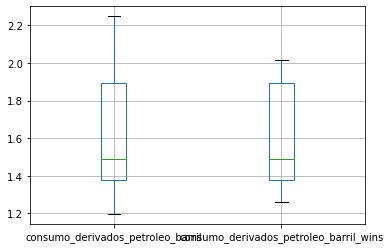

In [ ]:
wins('consumo_derivados_petroleo_barril')

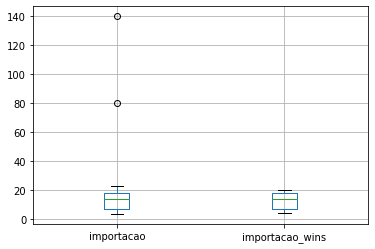

In [ ]:
wins('importacao')

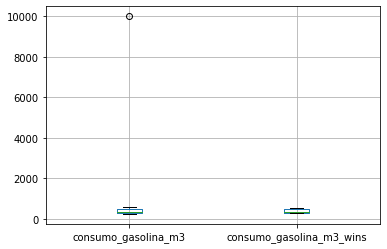

In [ ]:
wins('consumo_gasolina_m3')